In [1]:
from binning import *
from data_generation import *
from nev import *

In [29]:
from skimage import data, io, filters
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [48]:
distributions= {}

for d in [data.astronaut, data.camera, data.cat, data.coffee, data.coins]:
    image= d()
    if len(image.shape) == 3:
        image= np.mean(image, axis=2)
    image= image/255.0
    distributions[str(d.__name__)]= np.histogram(image, bins=20, range=(0.0, 1.0))[0]

for key in distributions:
    distributions[key]= distributions[key]/np.sum(distributions[key])

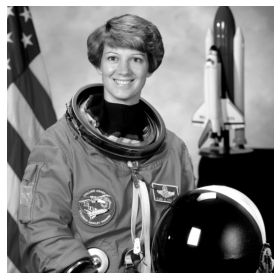

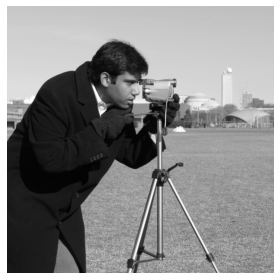

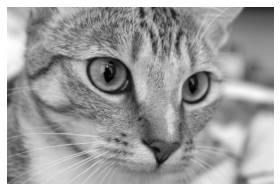

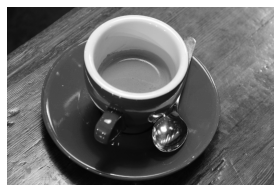

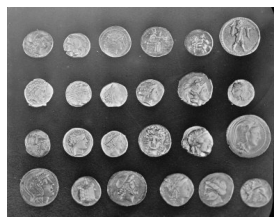

In [40]:
for d in [data.astronaut, data.camera, data.cat, data.coffee, data.coins]:
    fig, axes= plt.subplots(1, 1, figsize=(4,4))
    image= d()
    if len(image.shape) == 3:
        image= np.mean(image, axis=2)
    axes.imshow(image, cmap='gray')
    plt.axis('off')
    plt.tight_layout()
    plt.savefig('%s.pdf' % str(d.__name__))

In [59]:
dists= pd.DataFrame({key: distributions[key] for key in distributions}).reset_index(drop=False)
dists['index']= dists['index']/len(dists['index'])
dists= dists.rename({'index': 'intensity'}, axis=1)

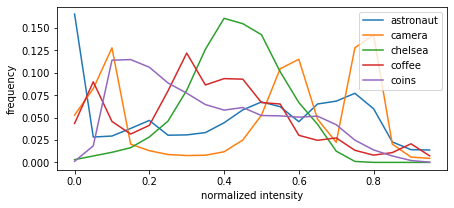

In [261]:
dists.plot(x='intensity', figsize=(7, 3), xlabel='normalized intensity', ylabel='frequency')
plt.savefig('dists.pdf')

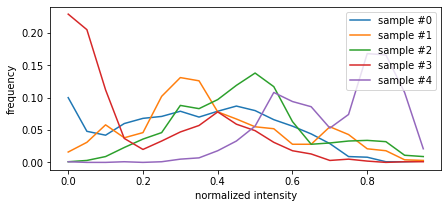

In [271]:
distributions_own= {}

for d in range(5):
    template= generate_t(1000, gamma=True)
    distributions_own[str(d)]= np.histogram(template/np.max(template), bins=20, range=(0.0, 1.0))[0]

for key in distributions_own:
    distributions_own[key]= distributions_own[key]/np.sum(distributions_own[key])
dists_own= pd.DataFrame({'sample #' + key: distributions_own[key] for key in distributions_own}).reset_index(drop=False)
dists_own['index']= dists_own['index']/len(dists_own['index'])
dists_own= dists_own.rename({'index': 'intensity'}, axis=1)
dists_own.plot(x='intensity', figsize=(7, 3), xlabel='normalized intensity', ylabel='frequency')

plt.savefig('dists_own.pdf')

In [86]:
a= data.camera()

In [222]:
# lower and upper bounds of the white noise standard deviation
sigma_lower=0.0
sigma_upper=10.0

# lower and upper bounds of the spherical distortion standard deviation
sigma_m_lower=0.0
sigma_m_upper=3.0

spherical=False

In [11]:
t= a.reshape(len(a[0])**2)

15.68698104542889


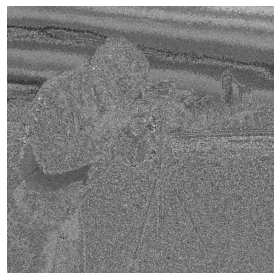

In [230]:
# random sigma for white noise
sigma= sigma_lower + np.random.rand()*(sigma_upper - sigma_lower)

# random sigma for spherical distribution (used only if spherical = True)
sigma_m= sigma_m_lower + np.random.rand()*(sigma_m_upper - sigma_m_lower)

# generating a template
#t= generate_t(d, spherical)

d_tau= len(np.unique(t))

# generating a covariance structure
C= generate_C(t, spherical, sigma_m)
# generating a mean vector
distortion_mean= None
if spherical:
    distortion_mean= generate_tau(t)/np.max(t)
else:
    #distortion_mean= np.random.normal(size=len(C))
    #distortion_mean= np.convolve(distortion_mean, np.ones(int(len(distortion_mean)/5))/int(len(distortion_mean)/5), mode='same')
    #distortion_mean= np.round(distortion_mean, 1)
    distortion_mean= np.random.normal(size=len(C)).cumsum()
    distortion_mean= distortion_mean/np.max(distortion_mean)
    #distortion_mean= np.random.random(len(C)).cumsum()
cross_product= C + np.outer(distortion_mean, distortion_mean)
A= None

# generating a noisy window
w_noise= generate_noisy_window(d, sigma)

# generating a distorted template
w_distorted, snr= generate_distorted_t(t, C, distortion_mean, sigma)

wimg= ((w_distorted.reshape(512, 512) - np.min(w_distorted))/(np.max(w_distorted) - np.min(w_distorted))*255)

print(snr)

fig, axes= plt.subplots(1, 1, figsize=(4,4))
axes.imshow(wimg, cmap='gray')
plt.axis('off')
plt.tight_layout()
plt.savefig('dist_%s.pdf' % str(int(snr)))

In [192]:
distortion_mean

array([-0.93881079, -0.36226776, -0.64469464, -1.52001107, -2.16355687,
       -2.99068114, -3.61908192, -3.95450041, -0.84859595, -2.10950038,
       -1.25054257, -0.55551193, -1.52850989, -1.95174518, -0.76729363,
       -0.46429904, -1.06991637, -0.78069337, -1.51965233, -1.02339731,
       -1.37772121, -1.0368067 , -0.42775682, -2.200569  , -2.72054169,
       -3.69760353, -3.04683292, -3.73587476, -4.76125124, -4.94069986,
       -5.50674847, -6.20107113, -5.81363176, -5.94280793, -6.67541066,
       -6.73562929, -6.63520734, -5.85852342, -6.1320853 , -5.92134227,
       -5.11542495, -6.00338755, -5.13721604, -5.00092371, -3.75968134,
       -3.92738216, -4.68095543, -3.13291841, -2.39554223, -4.71359438,
       -4.75439542, -3.772782  , -2.68562683, -2.01171499, -1.61203057,
       -2.38445191, -4.11850256, -3.49257114, -3.42095385, -2.70516284,
       -2.29469504, -2.70286008, -2.64642273, -1.60749939, -1.00860306,
       -0.56104076, -2.4493275 , -4.38110795, -1.57365448, -2.99

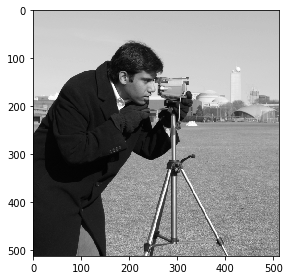

In [117]:
io.imshow(a, cmap='gray')

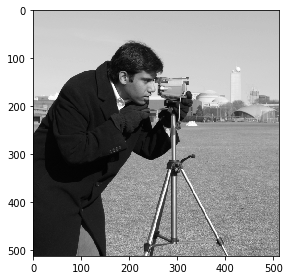

In [ ]:
io.imshow(a)

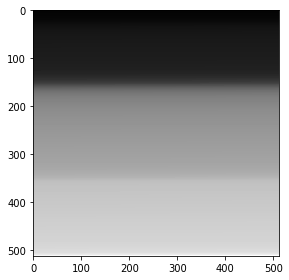

In [ ]:
b= np.array(sorted(a.flatten())).reshape(a.shape)
io.imshow(b)



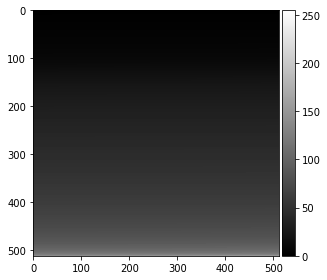

In [18]:
t= (np.array(sorted(generate_t(512*512, gamma=True)))*255).reshape(a.shape)
io.imshow(t, cmap='gray')